In [20]:
from google.colab import drive
drive.mount('/content/drive')
!unrar x  "drive/My Drive/AgeDB.rar" "dataset/"

Streaming output truncated to the last 5000 lines.
Extracting  dataset/AgeDB/5501_MichaelKeaton_50_m.jpg                     69%  OK 
Extracting  dataset/AgeDB/5502_MichaelKeaton_51_m.jpg                     69%  OK 
Extracting  dataset/AgeDB/5503_MichaelKeaton_52_m.jpg                     69%  OK 
Extracting  dataset/AgeDB/5504_MichaelKeaton_53_m.jpg                     70%  OK 
Extracting  dataset/AgeDB/5505_MichaelKeaton_55_m.jpg                     70%  OK 
Extracting  dataset/AgeDB/5506_MichaelKeaton_58_m.jpg                     70%  OK 
Extracting  dataset/AgeDB/5507_MichaelKeaton_59_m.jpg                     70%  OK 
Extracting  dataset/AgeDB/5508_MichaelKeaton_60_m.jpg                     70%  OK 
Extracting  dataset/AgeDB/5509_MichaelKeaton_61_m.jpg                     70%  OK 
Extracting  dataset/AgeDB/550_angelamerkel_51_f.jpg                       70%  OK 
Extracting  dataset/AgeDB/551

In [21]:
data=[]



import cv2
import glob, os
os.chdir("/content/dataset/AgeDB/")
for file in glob.glob("*.jpg"):
    data.append([file,int(file.split('_')[-2])])


In [22]:
data[0]

['13083_GraceKelly_48_f.jpg', 48]

In [23]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 4.3MB/s 


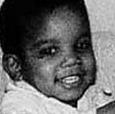

In [24]:

# function for face detection with mtcnn
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
image = cv2.imread('/content/dataset/AgeDB/'+'255_michaeljackson_3_m.jpg') 
import tensorflow
cv2_imshow(image)

x=[]
y=[]
WIDTH = 64
HEIGHT = 64


for z in data:
  full_size_image = asarray(cv2.imread(str(z[0]),0)).astype('float32')
  x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_AREA))
  y.append(z[1])

In [ ]:
x[0]

array([[144.8755  , 145.47488 , 149.35333 , ..., 126.65072 , 124.16268 ,
        124.      ],
       [147.74434 , 148.07083 , 151.35947 , ..., 126.6507  , 124.162674,
        124.      ],
       [149.82718 , 149.48769 , 171.35782 , ..., 127.51223 , 126.27411 ,
        125.86396 ],
       ...,
       [213.4128  , 221.47562 , 236.47545 , ..., 180.45706 , 171.76498 ,
        149.48784 ],
       [214.56473 , 231.1933  , 236.58325 , ..., 189.9495  , 164.8368  ,
        164.47362 ],
       [213.25226 , 221.69788 , 221.24574 , ..., 183.53328 , 159.42072 ,
        175.11377 ]], dtype=float32)

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)



x_train = x_train.reshape(-1,HEIGHT,WIDTH,1)
x_test = x_test.reshape(-1,HEIGHT,WIDTH,1)

In [ ]:
#CVPR 2015 model
from keras import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D,MaxPooling2D,ZeroPadding2D,Dropout,Flatten,Activation, LayerNormalization
import keras
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras import activations

model = Sequential()


model.add(Convolution2D(64, (7 , 7), activation='relu'))
model.add(Activation(activations.relu))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(LayerNormalization())
 
model.add(Convolution2D(96, (5 , 5), activation='relu'))
model.add(Activation(activations.relu))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(LayerNormalization())
 
model.add(Convolution2D(128, (3 , 3), activation='relu'))
model.add(Activation(activations.relu))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', trainable=True))
model.add(Activation(activations.relu))
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu', trainable=True))
model.add(Activation(activations.relu))
model.add(Dropout(0.5))



model.add(Dense(1, activation='relu'))


model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.3,
                              patience=5, min_lr=0.001)

model.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=64, callbacks=[reduce_lr])


Epoch 1/5
186/186 [==============================] - 243s 1s/step - loss: 470.3511 - mae: 17.3924 - val_loss: 315.9849 - val_mae: 14.1746
Epoch 2/5
186/186 [==============================] - 242s 1s/step - loss: 400.4082 - mae: 16.2245 - val_loss: 307.1325 - val_mae: 14.0678
Epoch 3/5
186/186 [==============================] - 242s 1s/step - loss: 402.8241 - mae: 16.2635 - val_loss: 421.5405 - val_mae: 15.9078
Epoch 4/5
186/186 [==============================] - 242s 1s/step - loss: 398.7030 - mae: 16.1672 - val_loss: 505.3974 - val_mae: 17.6042
Epoch 5/5
186/186 [==============================] - 240s 1s/step - loss: 338.1996 - mae: 14.7267 - val_loss: 253.8071 - val_mae: 12.6051


In [ ]:
results = model.evaluate(x_test, y_test, batch_size=50)
print("test loss, test acc:", results)

66/66 [==============================] - 18s 274ms/step - loss: 273.1349 - mae: 13.2141
test loss, test acc: [273.1348876953125, 13.214102745056152]


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import tensorflow.keras.layers as L

model2 = tf.keras.Sequential([
    Layer.InputLayer(input_shape=(HEIGHT,WIDTH,1)),
    Layer.Conv2D(32, (3, 3), activation='relu',input_shape=(32,32,3)),
    Layer.BatchNormalization(),
    Layer.MaxPooling2D((2, 2)),
    Layer.Conv2D(64, (3, 3), activation='relu'),
    Layer.MaxPooling2D((2, 2)),
    Layer.Conv2D(128, (3, 3), activation='relu'),
    Layer.MaxPooling2D((2, 2)),
    Layer.Flatten(),
    Layer.Dense(64, activation='relu'),
    Layer.Dropout(rate=0.5),
    Layer.Dense(1, activation='relu')
])

#sgd = tf.keras.optimizers.SGD(momentum=0.9)

model2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.3,
                              patience=5, min_lr=0.001)

model2.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=64, callbacks=[reduce_lr])

Epoch 1/5
186/186 [==============================] - 83s 448ms/step - loss: 399.5754 - mae: 15.6482 - val_loss: 373.7158 - val_mae: 15.1737
Epoch 2/5
186/186 [==============================] - 83s 447ms/step - loss: 300.8854 - mae: 13.7517 - val_loss: 467.9873 - val_mae: 17.7216
Epoch 3/5
186/186 [==============================] - 83s 448ms/step - loss: 269.0739 - mae: 12.9168 - val_loss: 239.8212 - val_mae: 12.7069
Epoch 4/5
186/186 [==============================] - 87s 467ms/step - loss: 257.6530 - mae: 12.6628 - val_loss: 152.9797 - val_mae: 9.9506
Epoch 5/5
186/186 [==============================] - 83s 447ms/step - loss: 244.8613 - mae: 12.3324 - val_loss: 454.8247 - val_mae: 17.5712


In [ ]:
results = model2.evaluate(x_test, y_test, batch_size=50)
print("test loss, test acc:", results)

66/66 [==============================] - 6s 86ms/step - loss: 490.4309 - mae: 18.3421
test loss, test acc: [490.4308776855469, 18.342100143432617]


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import tensorflow.keras.layers as Layer

model2 = tf.keras.Sequential([
    Layer.InputLayer(input_shape=(HEIGHT,WIDTH,1)),
    Layer.Conv2D(32, (3, 3), activation='relu',input_shape=(32,32,1)),
    Layer.BatchNormalization(),
    Layer.MaxPooling2D((2, 2)),
    Layer.Conv2D(64, (3, 3), activation='relu'),
    Layer.MaxPooling2D((2, 2)),
    Layer.Conv2D(128, (3, 3), activation='relu'),
    Layer.MaxPooling2D((2, 2)),
    Layer.Flatten(),
    Layer.Dense(64, activation='relu'),
    Layer.Dropout(rate=0.5),
    Layer.Dense(1, activation='relu')
])

#sgd = tf.keras.optimizers.SGD(momentum=0.9)

model2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.3,
                              patience=5, min_lr=0.001)

model2.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=64, callbacks=[reduce_lr])

Epoch 1/5
186/186 [==============================] - 84s 451ms/step - loss: 429.0484 - mae: 16.1475 - val_loss: 473.6011 - val_mae: 17.6434
Epoch 2/5
186/186 [==============================] - 84s 451ms/step - loss: 298.2528 - mae: 13.6424 - val_loss: 804.4292 - val_mae: 25.3299
Epoch 3/5
186/186 [==============================] - 84s 449ms/step - loss: 277.0772 - mae: 13.1138 - val_loss: 182.6680 - val_mae: 10.7686
Epoch 4/5
186/186 [==============================] - 83s 448ms/step - loss: 259.4972 - mae: 12.6782 - val_loss: 228.9396 - val_mae: 11.8964
Epoch 5/5
186/186 [==============================] - 83s 447ms/step - loss: 257.8531 - mae: 12.6117 - val_loss: 236.6906 - val_mae: 12.1625


In [ ]:
results = model2.evaluate(x_test, y_test, batch_size=50)
print("test loss, test acc:", results)

66/66 [==============================] - 6s 86ms/step - loss: 262.3012 - mae: 12.9965
test loss, test acc: [262.3012390136719, 12.996532440185547]


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import tensorflow.keras.layers as Layer

model2 = tf.keras.Sequential([
    Layer.InputLayer(input_shape=(HEIGHT,WIDTH,1)),
    Layer.Conv2D(32, (3, 3), activation='relu'),
    Layer.BatchNormalization(),
    Layer.MaxPooling2D((2, 2)),
    Layer.Conv2D(64, (3, 3), activation='relu'),
    Layer.MaxPooling2D((2, 2)),
    Layer.Conv2D(128, (3, 3), activation='relu'),
    Layer.MaxPooling2D((2, 2)),
    Layer.Flatten(),
    Layer.Dense(64, activation='relu'),
    Layer.Dropout(rate=0.5),
    Layer.Dense(1, activation='relu')
])

#sgd = tf.keras.optimizers.SGD(momentum=0.9)

model2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.3,
                              patience=5, min_lr=0.001)

model2.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=64, callbacks=[reduce_lr])

Epoch 1/5
186/186 [==============================] - 88s 475ms/step - loss: 396.6056 - mae: 15.6224 - val_loss: 545.8223 - val_mae: 19.4164
Epoch 2/5
186/186 [==============================] - 83s 447ms/step - loss: 278.1279 - mae: 13.1884 - val_loss: 399.9375 - val_mae: 15.8544
Epoch 3/5
186/186 [==============================] - 83s 447ms/step - loss: 267.1942 - mae: 12.9051 - val_loss: 184.4068 - val_mae: 10.7704
Epoch 4/5
186/186 [==============================] - 83s 448ms/step - loss: 247.4870 - mae: 12.3888 - val_loss: 229.5362 - val_mae: 12.0047
Epoch 5/5
186/186 [==============================] - 84s 452ms/step - loss: 235.2704 - mae: 12.0604 - val_loss: 199.2649 - val_mae: 11.3982


In [ ]:
results = model2.evaluate(x_test, y_test, batch_size=50)
print("test loss, test acc:", results)

66/66 [==============================] - 6s 87ms/step - loss: 189.7537 - mae: 11.0852
test loss, test acc: [189.75369262695312, 11.08517837524414]


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import tensorflow.keras.layers as Layer

model2 = tf.keras.Sequential([
    Layer.InputLayer(input_shape=(HEIGHT,WIDTH,1)),
    Layer.Conv2D(32, (3, 3), activation='relu'),
    Layer.BatchNormalization(),
    Layer.MaxPooling2D((2, 2)),
    Layer.Conv2D(64, (3, 3), activation='relu'),
    Layer.MaxPooling2D((2, 2)),
    Layer.Conv2D(128, (3, 3), activation='relu'),
    Layer.MaxPooling2D((2, 2)),
    Layer.Flatten(),
    Layer.Dense(64, activation='relu'),
    Layer.Dropout(rate=0.2),
    Layer.Dense(1, activation='relu')
])

#sgd = tf.keras.optimizers.SGD(momentum=0.9)

model2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.3,
                              patience=5, min_lr=0.001)

model2.fit(x_train, y_train, epochs=20, validation_split=0.1, batch_size=64, callbacks=[reduce_lr])

Epoch 1/20
186/186 [==============================] - 83s 448ms/step - loss: 329.9480 - mae: 14.1980 - val_loss: 816.6296 - val_mae: 24.4656
Epoch 2/20
186/186 [==============================] - 83s 445ms/step - loss: 216.7664 - mae: 11.6238 - val_loss: 321.4984 - val_mae: 14.3270
Epoch 3/20
186/186 [==============================] - 83s 449ms/step - loss: 203.0662 - mae: 11.2458 - val_loss: 208.3996 - val_mae: 11.4092
Epoch 4/20
186/186 [==============================] - 83s 448ms/step - loss: 183.0845 - mae: 10.7004 - val_loss: 223.1713 - val_mae: 11.7253
Epoch 5/20
186/186 [==============================] - 83s 448ms/step - loss: 166.7182 - mae: 10.1878 - val_loss: 152.7830 - val_mae: 9.8815
Epoch 6/20
186/186 [==============================] - 84s 449ms/step - loss: 153.8317 - mae: 9.7815 - val_loss: 145.0224 - val_mae: 9.5547
Epoch 7/20
186/186 [==============================] - 83s 449ms/step - loss: 151.0377 - mae: 9.6791 - val_loss: 202.8257 - val_mae: 11.2832
Epoch 8/20
186/18

In [ ]:
results = model2.evaluate(x_test, y_test, batch_size=50)
print("test loss, test acc:", results)

66/66 [==============================] - 6s 90ms/step - loss: 151.9768 - mae: 9.6479
test loss, test acc: [151.97677612304688, 9.64786434173584]


In [ ]:
model2.save_weights("abs_age_model")

In [ ]:
results = model2.evaluate(x_test, y_test)
print("test loss, test acc:", results)

104/104 [==============================] - 6s 57ms/step - loss: 151.9768 - mae: 9.6479
test loss, test acc: [151.97679138183594, 9.64786434173584]


In [ ]:
!ls

In [ ]:
os.chdir("/content/dataset/")
model2.save_weights("abs_age_model.h5")

In [28]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import tensorflow.keras.layers as Layer
WIDTH = 64
HEIGHT = 64
model2 = tf.keras.Sequential([
    Layer.InputLayer(input_shape=(HEIGHT,WIDTH,1)),
    Layer.Conv2D(32, (3, 3), activation='relu'),
    Layer.BatchNormalization(),
    Layer.MaxPooling2D((2, 2)),
    Layer.Conv2D(64, (3, 3), activation='relu'),
    Layer.MaxPooling2D((2, 2)),
    Layer.Conv2D(128, (3, 3), activation='relu'),
    Layer.MaxPooling2D((2, 2)),
    Layer.Flatten(),
    Layer.Dense(64, activation='relu'),
    Layer.Dropout(rate=0.2),
    Layer.Dense(1, activation='relu')
])

#sgd = tf.keras.optimizers.SGD(momentum=0.9)

model2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.3,
                              patience=5, min_lr=0.001)

model2.fit(x_train, y_train, epochs=20, validation_split=0.1, batch_size=64, callbacks=[reduce_lr])

Epoch 1/20
232/232 [==============================] - 123s 529ms/step - loss: 292.8769 - mae: 13.3870 - val_loss: 224.2129 - val_mae: 11.7698
Epoch 2/20
232/232 [==============================] - 121s 522ms/step - loss: 201.1603 - mae: 11.2499 - val_loss: 165.2175 - val_mae: 10.1866
Epoch 3/20
232/232 [==============================] - 122s 524ms/step - loss: 194.2953 - mae: 10.9707 - val_loss: 510.1257 - val_mae: 19.0881
Epoch 4/20
232/232 [==============================] - 127s 546ms/step - loss: 175.3401 - mae: 10.4187 - val_loss: 199.9013 - val_mae: 11.1797
Epoch 5/20
232/232 [==============================] - 121s 522ms/step - loss: 156.0285 - mae: 9.8086 - val_loss: 160.6903 - val_mae: 9.9967
Epoch 6/20
232/232 [==============================] - 120s 518ms/step - loss: 142.3535 - mae: 9.3994 - val_loss: 140.5859 - val_mae: 9.4641
Epoch 7/20
232/232 [==============================] - 120s 518ms/step - loss: 132.1559 - mae: 8.9912 - val_loss: 130.1210 - val_mae: 9.1055
Epoch 8/20
2

In [30]:
results = model2.evaluate(x_test, y_test)
print("test loss, test acc:", results)

104/104 [==============================] - 7s 63ms/step - loss: 47.1594 - mae: 5.3579
test loss, test acc: [47.15943908691406, 5.357875347137451]


In [ ]:
os.chdir("/content/dataset/")
model2.save_weights("abs_age_itself_model.h5")

In [7]:
!ls

abs_age_itself_model.h5  class_age_model.h5  sample_data


In [17]:
model2.load_weights('/content/class_age_model.h5')

In [18]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0